## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
import category_encoders as ce
from sklearn.model_selection import cross_val_score 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (make_scorer, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, normalized_mutual_info_score)
 
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'imblearn'

## Loading and Making a copy of the Dataset

In [3]:
#To help view the entire rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
fuel_consumption_df = pd.read_csv('Fuel Consumption.csv', encoding = 'cp1252')

fuel_consum_df = fuel_consumption_df.copy()
fuel_consum_df

MODEL           MAKE                                  MODEL.1  \
0     YEAR            NaN                   # = high output engine   
1     2010          ACURA                                      CSX   
2     2010          ACURA                                      CSX   
3     2010          ACURA                                      CSX   
4     2010          ACURA                                  MDX AWD   
5     2010          ACURA                            RDX AWD TURBO   
6     2010          ACURA                                   RL AWD   
7     2010          ACURA                                       TL   
8     2010          ACURA                                   TL AWD   
9     2010          ACURA                                   TL AWD   
10    2010          ACURA                                      TSX   
11    2010          ACURA                                      TSX   
12    2010          ACURA                                      TSX   
13    2010   ASTON MARTIN                                      DB9   
14    2010   ASTON MARTIN                                      DB9   
15    2010   ASTON MARTIN                                      DBS   
16    2010   ASTON MARTIN                                      DBS   
17    2010   ASTON MARTIN                               V8 VANTAGE   
18    2010   ASTON MARTIN                               V8 VANTAGE   
19    2010           AUDI                                       A3   
20    2010           AUDI                                       A3   
21    2010           AUDI                               A3 QUATTRO   
22    2010           AUDI                        A3 TDI (modified)   
23    2010           AUDI                                       A4   
24    2010           AUDI                         A4 AVANT QUATTRO   
25    2010           AUDI                               A4 QUATTRO   
26    2010           AUDI                               A4 QUATTRO   
27    2010           AUDI                     A5 CABRIOLET QUATTRO   
28    2010           AUDI                                 A5 COUPE   
29    2010           AUDI                                 A5 COUPE   
30    2010           AUDI                                 A5 COUPE   
31    2010           AUDI                                       A6   
32    2010           AUDI                         A6 AVANT QUATTRO   
33    2010           AUDI                               A6 QUATTRO   
34    2010           AUDI                               A6 QUATTRO   
35    2010           AUDI                                       A8   
36    2010           AUDI                                     A8 L   
37    2010           AUDI                                       Q5   
38    2010           AUDI                                       Q7   
39    2010           AUDI                                       Q7   
40    2010           AUDI                        Q7 TDI (modified)   
41    2010           AUDI                                       R8   
42    2010           AUDI                                       R8   
43    2010           AUDI                                       R8   
44    2010           AUDI                                       R8   
45    2010           AUDI                                       S4   
46    2010           AUDI                                       S4   
47    2010           AUDI                             S5 CABRIOLET   
48    2010           AUDI                                 S5 COUPE   
49    2010           AUDI                                 S5 COUPE   
50    2010           AUDI                                       S6   
51    2010           AUDI                         TT COUPE QUATTRO   
52    2010           AUDI                      TT ROADSTER QUATTRO   
53    2010        BENTLEY                                    AZURE   
54    2010        BENTLEY                  CONTINENTAL FLYING SPUR   
55    2010        BENTLEY                           CONTINENTAL GT   
56    2010     

## Data Preprocessing

### Data Overview

In [5]:
#Viewing the columns that make up this data
fuel_consum_df.columns

Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION*', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'CO2 EMISSIONS '],
      dtype='object')

In [6]:
#renamed the column
#MODEL to YEAR, MODEL.1 to MODEL, FUEL CONSUMPTION to FL_CITY(L/100km), 
#all others with unnamed as follows; FL_HWY(L/100km), FL_COMB(100/km),FL_COMB(mpg)
fuel_consum_df.rename(columns={'MODEL':'YEAR','MODEL.1':'MODEL','FUEL':'FUEL TYPE','FUEL CONSUMPTION*':'FC_CITY(L/100km)',
                               'Unnamed: 9':'FC_HWY(L/100km)','Unnamed: 10':'FC_COMB(L/100km)',
                               'Unnamed: 11':'FC_COMB(mpg)','CO2 EMISSIONS ':'CO2 EMISSIONS(g/km)'}, inplace=True)

In [7]:
#Dropped the first row
fuel_consum_df = fuel_consum_df.drop(0)

In [8]:
#Overview of the dataset
fuel_consum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 1 to 5359
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5359 non-null   object 
 1   MAKE                 5359 non-null   object 
 2   MODEL                5359 non-null   object 
 3   VEHICLE CLASS        5359 non-null   object 
 4   ENGINE SIZE          5359 non-null   object 
 5   CYLINDERS            5359 non-null   float64
 6   TRANSMISSION         5359 non-null   object 
 7   FUEL TYPE            5359 non-null   object 
 8   FC_CITY(L/100km)     5359 non-null   object 
 9   FC_HWY(L/100km)      5359 non-null   object 
 10  FC_COMB(L/100km)     5359 non-null   object 
 11  FC_COMB(mpg)         5359 non-null   object 
 12  CO2 EMISSIONS(g/km)  5359 non-null   object 
dtypes: float64(1), object(12)
memory usage: 586.1+ KB


In [9]:
#The total number of null values in each of the columns
fuel_consum_df.isnull().sum()

YEAR                   0
MAKE                   0
MODEL                  0
VEHICLE CLASS          0
ENGINE SIZE            0
CYLINDERS              0
TRANSMISSION           0
FUEL TYPE              0
FC_CITY(L/100km)       0
FC_HWY(L/100km)        0
FC_COMB(L/100km)       0
FC_COMB(mpg)           0
CO2 EMISSIONS(g/km)    0
dtype: int64

In [10]:
#Casting the different variables into their respective data types.
fuel_consum_df['CYLINDERS'] = fuel_consum_df['CYLINDERS']#.astype(float).astype(int)
fuel_consum_df['YEAR'] = fuel_consum_df['YEAR']
fuel_consum_df['ENGINE SIZE'] = fuel_consum_df['ENGINE SIZE'].astype(float).astype(float)
fuel_consum_df['FC_CITY(L/100km)'] = fuel_consum_df['FC_CITY(L/100km)'].astype(float)
fuel_consum_df['FC_HWY(L/100km)'] = fuel_consum_df['FC_HWY(L/100km)'].astype(float)
fuel_consum_df['FC_COMB(L/100km)'] = fuel_consum_df['FC_COMB(L/100km)'].astype(float)
fuel_consum_df['FC_COMB(mpg)'] = fuel_consum_df['FC_COMB(mpg)'].astype(int)
fuel_consum_df['CO2 EMISSIONS(g/km)'] = fuel_consum_df['CO2 EMISSIONS(g/km)'].astype(int)

In [11]:
#The data set columns(variables)
fuel_consum_df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL TYPE', 'FC_CITY(L/100km)', 'FC_HWY(L/100km)',
       'FC_COMB(L/100km)', 'FC_COMB(mpg)', 'CO2 EMISSIONS(g/km)'],
      dtype='object')

In [12]:
#Dataset statistics in a transposed format
fuel_consum_df.describe().transpose()

count        mean        std    min    25%    50%  \
ENGINE SIZE          5359.0    3.491901   1.390957    1.0    2.4    3.5   
CYLINDERS            5359.0    5.962120   1.872838    2.0    4.0    6.0   
FC_CITY(L/100km)     5359.0   13.902650   4.162894    4.5   11.0   13.2   
FC_HWY(L/100km)      5359.0    9.932208   2.807196    4.9    8.0    9.3   
FC_COMB(L/100km)     5359.0   12.116328   3.524127    4.7    9.7   11.4   
FC_COMB(mpg)         5359.0   25.168875   6.956407   11.0   20.0   25.0   
CO2 EMISSIONS(g/km)  5359.0  267.660198  64.317040  108.0  221.0  260.0   

                       75%    max  
ENGINE SIZE            4.6    8.4  
CYLINDERS              8.0   16.0  
FC_CITY(L/100km)      16.0   30.4  
FC_HWY(L/100km)       11.2   20.8  
FC_COMB(L/100km)      13.9   26.0  
FC_COMB(mpg)          29.0   60.0  
CO2 EMISSIONS(g/km)  305.0  566.0

In [13]:
#Overview of dataset
fuel_consum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 1 to 5359
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5359 non-null   object 
 1   MAKE                 5359 non-null   object 
 2   MODEL                5359 non-null   object 
 3   VEHICLE CLASS        5359 non-null   object 
 4   ENGINE SIZE          5359 non-null   float64
 5   CYLINDERS            5359 non-null   float64
 6   TRANSMISSION         5359 non-null   object 
 7   FUEL TYPE            5359 non-null   object 
 8   FC_CITY(L/100km)     5359 non-null   float64
 9   FC_HWY(L/100km)      5359 non-null   float64
 10  FC_COMB(L/100km)     5359 non-null   float64
 11  FC_COMB(mpg)         5359 non-null   int32  
 12  CO2 EMISSIONS(g/km)  5359 non-null   int32  
dtypes: float64(5), int32(2), object(6)
memory usage: 544.3+ KB


### Creating the Numeric and Categorical Dataframe

In [14]:
#Numeric data
dataframe_numeric = fuel_consum_df.select_dtypes(exclude = 'object')

In [15]:
#Categorical data
dataframe_category = fuel_consum_df.select_dtypes(include = 'object')

### Plotting Histograms to show the distributions of each of the numeric variables

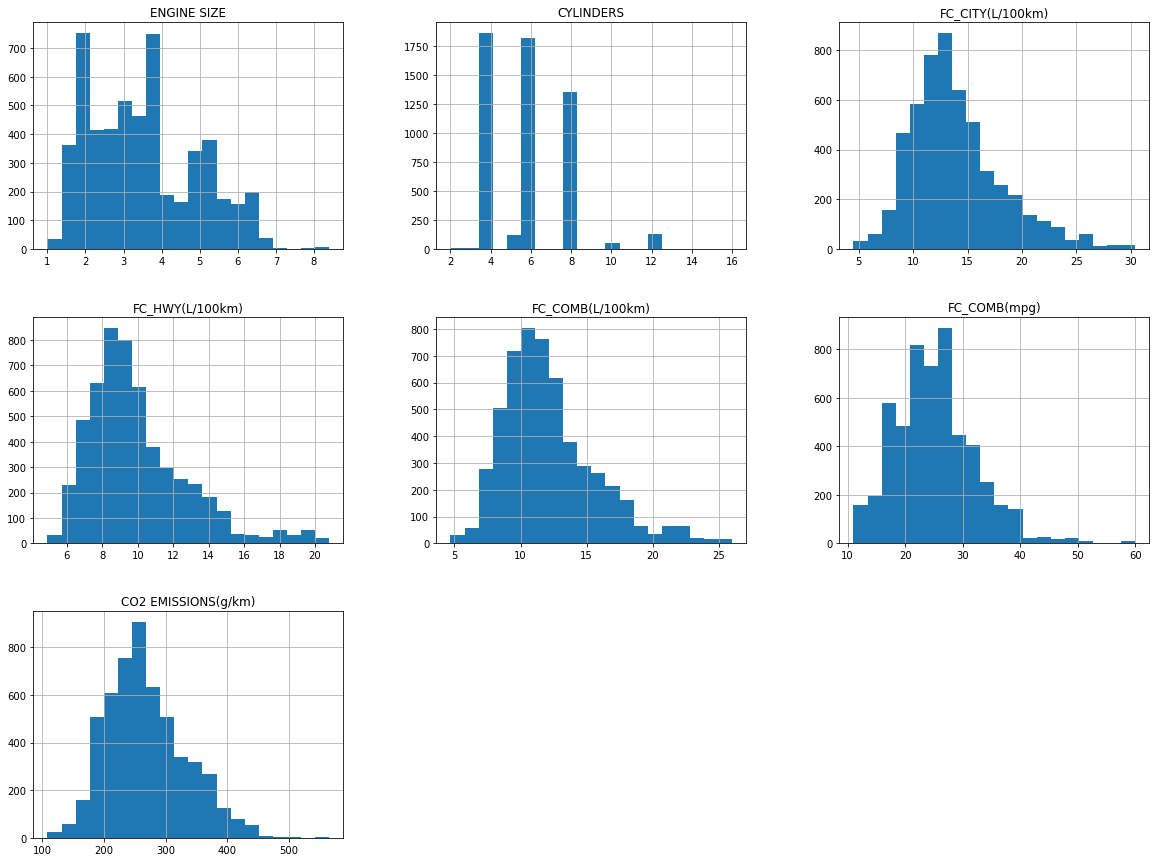

<Figure size 1200x800 with 0 Axes>

In [16]:
fuel_consum_df.hist(bins = 20, figsize = (20,15) )
plt.figure(dpi=200)
plt.show()

### Correlation

Text(0.5, 1.0, 'Relationships between Variables')

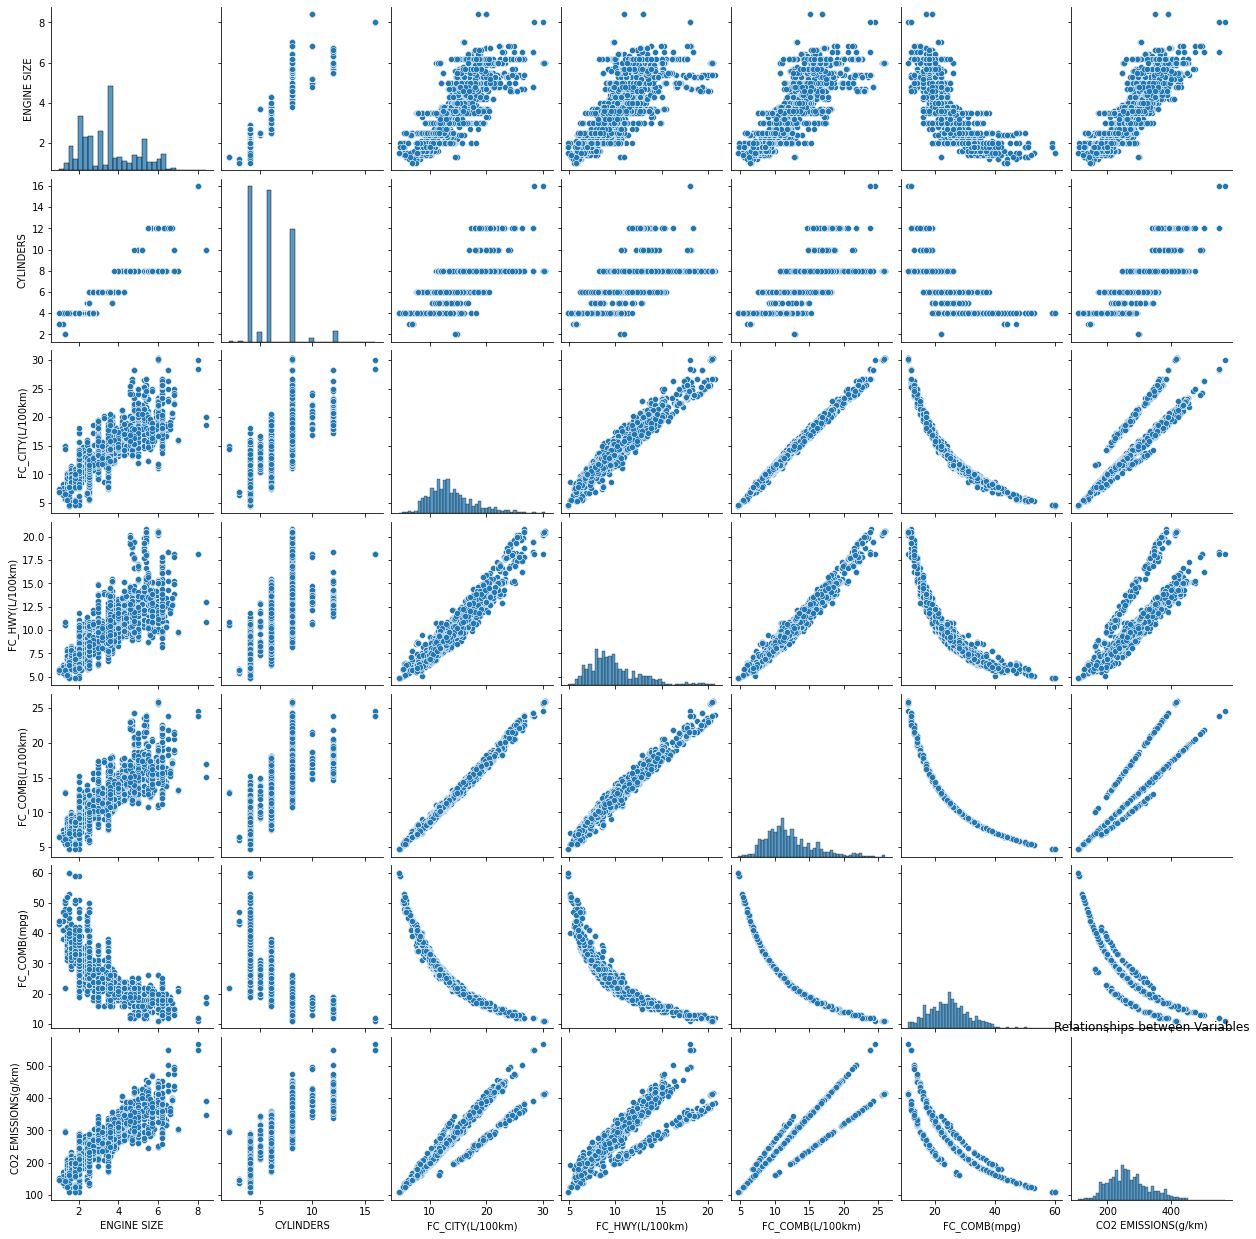

In [17]:
#Showing relationships between variables.
sns.pairplot(dataframe_numeric)
plt.title('Relationships between Variables', fontsize='12')

<AxesSubplot:>

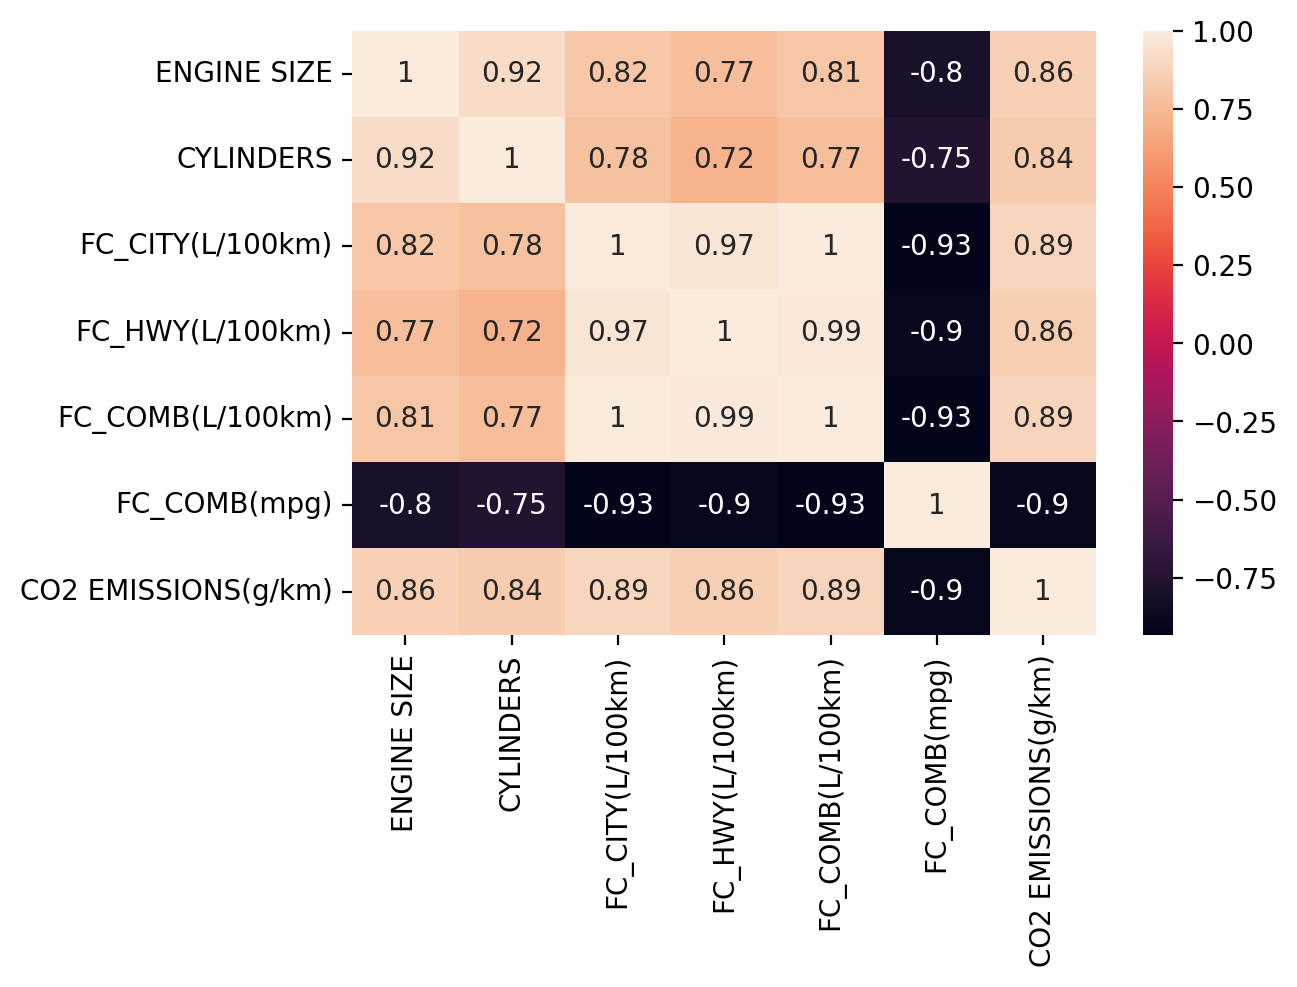

In [18]:
plt.figure(dpi=200)
sns.heatmap(dataframe_numeric.corr(), annot = True)

In [19]:
dataframe_numeric.corr()

ENGINE SIZE  CYLINDERS  FC_CITY(L/100km)  \
ENGINE SIZE             1.000000   0.917291          0.815753   
CYLINDERS               0.917291   1.000000          0.784184   
FC_CITY(L/100km)        0.815753   0.784184          1.000000   
FC_HWY(L/100km)         0.771050   0.716811          0.965417   
FC_COMB(L/100km)        0.806126   0.766065          0.995566   
FC_COMB(mpg)           -0.803472  -0.754037         -0.932240   
CO2 EMISSIONS(g/km)     0.857052   0.840469          0.891427   

                     FC_HWY(L/100km)  FC_COMB(L/100km)  FC_COMB(mpg)  \
ENGINE SIZE                 0.771050          0.806126     -0.803472   
CYLINDERS                   0.716811          0.766065     -0.754037   
FC_CITY(L/100km)            0.965417          0.995566     -0.932240   
FC_HWY(L/100km)             1.000000          0.985518     -0.895407   
FC_COMB(L/100km)            0.985518          1.000000     -0.926282   
FC_COMB(mpg)               -0.895407         -0.926282      1.000000   
CO2 EMISSIONS(g/km)         0.855552          0.885359     -0.897255   

                     CO2 EMISSIONS(g/km)  
ENGINE SIZE                     0.857052  
CYLINDERS                       0.840469  
FC_CITY(L/100km)                0.891427  
FC_HWY(L/100km)                 0.855552  
FC_COMB(L/100km)                0.885359  
FC_COMB(mpg)                   -0.897255  
CO2 EMISSIONS(g/km)             1.000000

### SPLITTING THE NUMERIC DATASET INTO TRAINING AND TEST SET

In [20]:
x = dataframe_numeric.iloc[:, :-1]
y = dataframe_numeric.iloc[:, -1]   #only the C02 Emmissions column (target variable)

In [21]:
#80% to the train set and 20% to the test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
#y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 42)
x, y = x_train, y_train
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state = 42)

### FEATURE SCALING

In [22]:
#scaling the independent numerical variables
mms = MinMaxScaler()
x_feat_train = mms.fit_transform(x_train)
x_feat_test = mms.transform(x_test)
x_feat_val = mms.transform(x_val)

In [23]:
#converting back to dataframe
x_feat_train = pd.DataFrame(x_feat_train, columns = x_train.columns)
x_feat_test = pd.DataFrame(x_feat_test, columns = x_test.columns)
x_feat_val = pd.DataFrame(x_feat_val, columns = x_val.columns)

## TRAINING REGRESSION MODELS

In [24]:
linear_regressor = LinearRegression()
decision_reg = DecisionTreeRegressor(random_state = 0)

In [25]:
#defined a function for testing the regressors
def testing_regression_model(model, X, y):
    y_pred = model.predict(X)
    mean_abs_err = mean_absolute_error(y, y_pred)
    mean_sqd = mean_squared_error(y, y_pred)
    print(f"The Coefficient of Determination is: {r2_score(y,y_pred):.2f}")

In [26]:
#defined function for cross validation of the models to aid select the best 
def cross_validate_(estimator, X_, y_):
    model_score = cross_val_score(estimator, X_, y_, scoring=make_scorer(r2_score), cv=5)
    score_std = model_score.std().round(2)
    score_mean = model_score.mean().round(2)
    print('Coefficient of determination')
    print(f'mean: {score_mean}, std: {score_std}')

### MULTIPLE LINEAR REGRESSION

In [27]:
#cross validation using coeeficient of determination as a selection metric
cross_validate_(linear_regressor, x_feat_train, y_train)

Coefficient of determination
mean: 0.88, std: 0.01


### DECISION TREE REGRESSION

In [28]:
#cross validation using coeeficient of determination as a selection metric
cross_validate_(decision_reg, x_feat_train, y_train)

Coefficient of determination
mean: 0.98, std: 0.01


### First Feature Selection After Training The Models

##### Selected four features, namely; FC_COM(L/100km), FC_HWY(L/100km), FC_CITY(L/100KM) and ENGINE SIZE

In [29]:
x_feat_traindrop = x_feat_train.drop(['FC_COMB(mpg)', 'CYLINDERS'], axis = 1)
x_feat_testdrop = x_feat_test.drop(['FC_COMB(mpg)', 'CYLINDERS'], axis = 1)

In [30]:
cross_validate_(linear_regressor, x_feat_traindrop, y_train)

Coefficient of determination
mean: 0.84, std: 0.01


In [31]:
cross_validate_(decision_reg, x_feat_traindrop, y_train)

Coefficient of determination
mean: 0.97, std: 0.01


### Second Feature Selection After Training The Models

##### Selected FC_COMB(L/100km) and ENGINE SIZE

In [32]:
x_feat_traindrop2 = x_feat_train.drop(['FC_COMB(mpg)','CYLINDERS','FC_CITY(L/100km)','FC_HWY(L/100km)'], axis = 1)
x_feat_testdrop2 = x_feat_test.drop(['FC_COMB(mpg)', 'CYLINDERS','FC_CITY(L/100km)','FC_HWY(L/100km)'], axis = 1)

In [33]:
cross_validate_(linear_regressor, x_feat_traindrop2, y_train)

Coefficient of determination
mean: 0.84, std: 0.01


In [34]:
cross_validate_(decision_reg, x_feat_traindrop2, y_train)

Coefficient of determination
mean: 0.98, std: 0.01


### Third Feature Selection

##### Selected  ENGINE SIZE and FC_COMB(mpg)

In [35]:
x_feat_traindrop3 = x_feat_train.drop(['FC_COMB(L/100km)', 'CYLINDERS','FC_CITY(L/100km)','FC_HWY(L/100km)'], axis = 1)
x_feat_testdrop3 = x_feat_test.drop(['FC_COMB(L/100km)', 'CYLINDERS','FC_CITY(L/100km)','FC_HWY(L/100km)'], axis = 1)

In [36]:
x_feat_valdrop = x_feat_val.drop(['FC_COMB(L/100km)', 'CYLINDERS','FC_CITY(L/100km)','FC_HWY(L/100km)'], axis = 1)

In [37]:
cross_validate_(linear_regressor, x_feat_traindrop3, y_train)

Coefficient of determination
mean: 0.86, std: 0.01


In [38]:
cross_validate_(decision_reg, x_feat_traindrop3, y_train)

Coefficient of determination
mean: 0.98, std: 0.01


In [39]:
#avearage CO2 Emissions value is 267.66
fuel_consum_df['CO2 EMISSIONS(g/km)'].mean()

267.66019779809665

<AxesSubplot:xlabel='CO2 EMISSIONS(g/km)', ylabel='Count'>

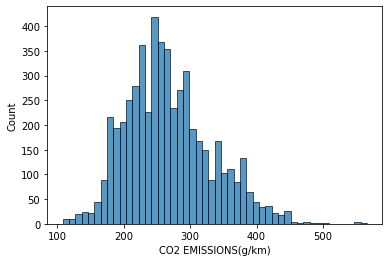

In [40]:
sns.histplot(data = fuel_consum_df, x = 'CO2 EMISSIONS(g/km)')

###  Grid Search, Cross Validation, Hyperparameter Tuning and  Regression Model Evaluation

In [41]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision+tree  1/12/2022
#Grid search and cross validation of the selected regression model on different parameters.
parameters = {'criterion':['squared_error','absolute_error', 'friedman_mse', 'poisson'],
              'max_depth': [12, 15, 20], 
              'max_features':[2, 3, 4]}

final_model = GridSearchCV(decision_reg, parameters)

In [42]:
#Hyperparameter tunning on the selected features engine size and fc_comb(mpg)
final_model.fit(x_feat_traindrop3, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [12, 15, 20], 'max_features': [2, 3, 4]})

In [43]:
#best parameters 
final_model.best_params_

{'criterion': 'squared_error', 'max_depth': 15, 'max_features': 2}

In [44]:
#Evaluation on the selected features engine size and fc_comb(mpg)
testing_regression_model(final_model, x_feat_testdrop3, y_test)

The Coefficient of Determination is: 0.97


In [45]:
testing_regression_model(final_model, x_feat_valdrop, y_val)

The Coefficient of Determination is: 0.96


<BarContainer object of 2 artists>

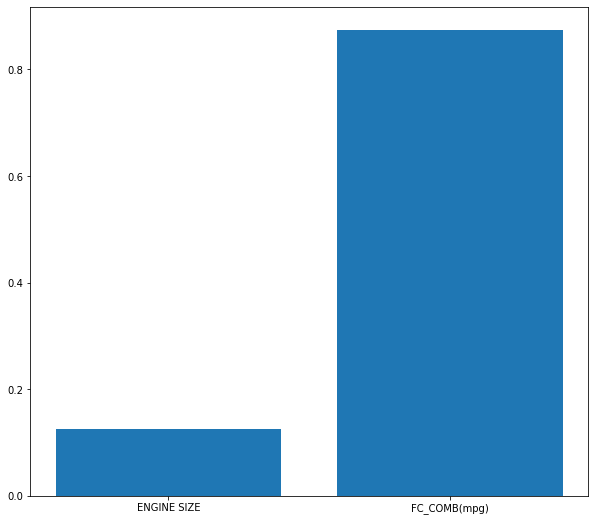

In [46]:
#Plot showing features that best explains this model
plt.figure(figsize=(10,9))
plt.bar(x_feat_traindrop3.columns, final_model.best_estimator_.feature_importances_)

In [47]:
y_pred = final_model.predict(x_feat_valdrop)
#https://www.geeksforgeeks.org/convert-a-numpy-array-to-a-pandas-series/  1/12/2022
y_pred_df = pd.DataFrame(list(zip(y_val,y_pred)), columns = ['y_val','y_pred'])
y_pred_df

y_val      y_pred
0      352  357.700000
1      239  242.700000
2      283  283.772727
3      313  308.320000
4      259  264.222222
5      260  261.440000
6      207  209.238095
7      244  242.700000
8      216  216.500000
9      306  307.285714
10     308  309.000000
11     269  271.689655
12     230  232.041667
13     258  260.255814
14     274  271.689655
15     248  254.229167
16     344  349.500000
17     196  185.157895
18     232  232.833333
19     371  378.400000
20     297  297.500000
21     281  283.954545
22     283  283.434783
23     246  254.229167
24     386  379.800000
25     262  261.400000
26     248  251.041667
27     110  110.000000
28     237  240.187500
29     267  271.689655
30     267  271.689655
31     301  297.761905
32     260  259.321429
33     345  339.769231
34     200  195.727273
35     221  223.870968
36     343  339.222222
37     184  185.333333
38     216  216.200000
39     253  254.229167
40     255  259.321429
41     225  223.870968
42     225  223.870968
43     297  296.750000
44     336  340.772727
45     205  203.545455
46     474  432.500000
47     265  263.441176
48     345  345.000000
49     296  294.894737
50     389  389.000000
51     304  307.500000
52     359  356.000000
53     347  349.250000
54     145  145.000000
55     225  223.870968
56     393  388.666667
57     248  249.444444
58     276  272.238095
59     331  320.142857
60     230  247.222222
61     202  201.400000
62     347  350.000000
63     207  209.238095
64     283  282.750000
65     262  260.255814
66     272  264.222222
67     283  284.923077
68     184  184.625000
69     265  263.441176
70     244  242.700000
71     297  296.714286
72     281  283.434783
73     338  237.500000
74     177  176.052632
75     212  209.404255
76     189  190.729730
77     292  297.761905
78     294  297.761905
79     242  233.636364
80     222  288.666667
81     320  319.372093
82     324  323.600000
83     274  274.945946
84     211  212.800000
85     283  283.772727
86     278  283.954545
87     225  223.870968
88     230  230.711111
89     362  362.000000
90     265  263.441176
91     221  223.870968
92     331  320.142857
93     338  331.333333
94     242  241.769231
95     318  318.000000
96     246  250.115385
97     283  284.230769
98     311  307.300000
99     269  272.238095
100    209  209.404255
101    251  252.000000
102    246  250.400000
103    189  189.000000
104    317  322.857143
105    400  399.000000
106    246  250.400000
107    248  250.115385
108    163  162.000000
109    225  224.186047
110    382  378.142857
111    283  284.923077
112    159  159.000000
113    253  254.229167
114    283  284.923077
115    258  259.321429
116    163  163.000000
117    398  403.500000
118    179  180.434783
119    214  216.500000
120    285  285.000000
121    242  240.775510
122    294  294.894737
123    138  138.000000
124    230  226.000000
125    110  110.000000
126    182  180.434783
127    398  398.000000
128    232  232.041667
129    225  223.870968
130    290  293.769231
131    269  272.238095
132    232  232.500000
133    248  249.500000
134    242  240.775510
135    131  130.333333
136    414  414.000000
137    311  309.000000
138    292  290.500000
139    242  240.775510
140    384  378.142857
141    251  250.400000
142    216  216.962963
143    166  185.157895
144    225  223.870968
145    258  259.321429
146    393  381.384615
147    278  283.772727
148    258  259.321429
149    308  308.714286
150    317  319.372093
151    403  406.600000
152    313  308.320000
153    262  260.255814
154    292  293.838710
155    382  383.600000
156    242  244.962963
157    426  438.541667
158    250  252.000000
159    251  250.400000
160    246  249.444444
161    359  359.666667
162    276  274.945946
163    207  209.404255
164    377  375.363636
165    239  240.775510
166    269  272.238095
167    228  223.870968
168    235  231.486486
169    267  267.000000
170    277  247.222222
171    223  224.105263
172    191  190.729730
173

In [48]:
#Hyperparameter tunning on all numerical variables
final_model.fit(x_feat_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [12, 15, 20], 'max_features': [2, 3, 4]})

In [49]:
#Evaluation on test data containing all numerical continuous variables
testing_regression_model(final_model, x_feat_test, y_test)

The Coefficient of Determination is: 0.99


<BarContainer object of 6 artists>

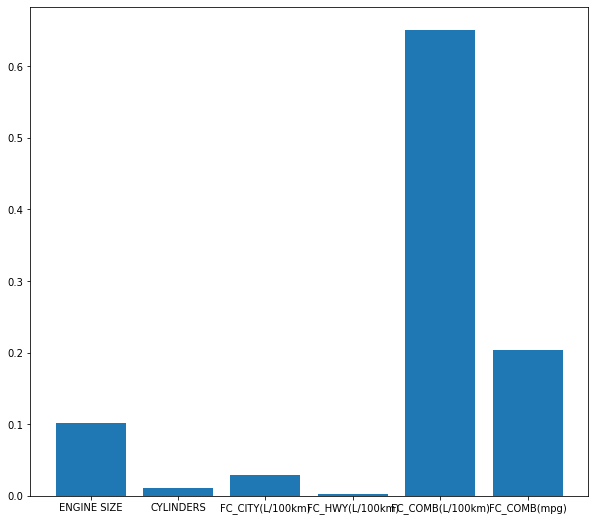

In [50]:
#Plot showing features that best explains this model
plt.figure(figsize=(10,9))
plt.bar(x_feat_train.columns, final_model.best_estimator_.feature_importances_)

### Plotting Predictions

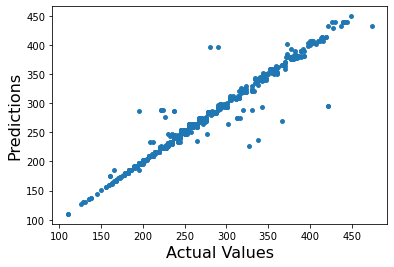

In [51]:
#these predictions are based on the two features selected.
plt.figure(figsize=(6,4))
plt.scatter(data = y_pred_df, x = 'y_val', y='y_pred', s=15)
plt.xlabel('Actual Values',fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.show()

### Plot showing CO2 Emissions over the years (2010-2014)

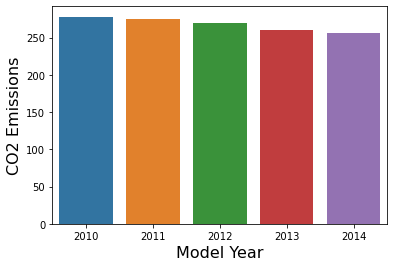

In [52]:
plt.figure(figsize=(6,4))
sns.barplot(data = fuel_consum_df, x = 'YEAR', y='CO2 EMISSIONS(g/km)', errorbar = None)
plt.xlabel('Model Year',fontsize=16)
plt.ylabel('CO2 Emissions', fontsize=16)
plt.show()

#https://seaborn.pydata.org/generated/seaborn.barplot.html  1/12/2022 night

# CLASSFICATION 

## FEATURE ENGINEERING

In [53]:
#function that helps select the target and independent variables and then splits the dataset into training and test sets
def train_test_split_(data, y_):
    X = data.drop([y_,'CYLINDERS','FC_HWY(L/100km)','FC_CITY(L/100km)','YEAR'], axis = 1)
    y = data[y_]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
    X, y = X_train, y_train
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state = 42)
    return X_train, X_test, X_val, y_train, y_test, y_val

#function to separate numeric and categorical data
def categorical_numeric_data(data):
    numerical_df = data.select_dtypes(exclude = 'object')
    categorical_df = data.select_dtypes(include = 'object')
    
    return numerical_df, categorical_df

## ENCODING CATEGORICAL VARIABLE AND FEATURE SCALING

In [54]:
## https://contrib.scikit-learn.org/category_encoders/onehot.html#category_encoders.one_hot.OneHotEncoder 4/12/2022 23:20
#function to encode categorical data using one hot encoder
def one_hot_encod_(X_tr, X_te, X_va):
    ohe = ce.OneHotEncoder(use_cat_names = True, handle_unknown='value', drop_invariant=True)
    X_train_ohe = ohe.fit_transform(X_tr)
    X_test_ohe = ohe.transform(X_te)
    X_val_ohe = ohe.transform(X_va)
    return X_train_ohe, X_test_ohe, X_val_ohe

#Function defined to scale numeric features
def scaling_(X_tr, X_te, X_v):
    scaler = MinMaxScaler()
    X_scaled_tr = scaler.fit_transform(X_tr)
    X_scaled_te = scaler.transform(X_te)
    X_scaled_v = scaler.transform(X_v)
    
    X_scaled_tr = pd.DataFrame(X_scaled_tr, columns= X_tr.columns, index = X_tr.index)
    X_scaled_te = pd.DataFrame(X_scaled_te, columns= X_tr.columns, index = X_te.index)
    X_scaled_v = pd.DataFrame(X_scaled_v, columns = X_tr.columns, index = X_v.index)
    
    return X_scaled_tr, X_scaled_te, X_scaled_v


In [55]:
#function defined to concatenate the scaled numeric features and the encoded categorical variables
def concat_(df1, df2):
    X_concat_df = pd.concat([df1,df2], axis = 1)
    return X_concat_df

## FUEL TYPE

### APPLYING SMOTE

In [56]:
def smoting_data(x_tr, y_tr, y):
    sm = SMOTE(random_state=42, k_neighbors = 2)
    x_residuals, y_residuals = sm.fit_resample(x_tr, y_tr)
    
    balanced_df = pd.concat([x_residuals, y_residuals], axis = 1)
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    a = sns.countplot(x = y, data = balanced_df, ax=ax[0])
    a = balanced_df[y].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])
    return x_residuals, y_residuals

In [57]:
X_train, X_test, X_val, y_train, y_test, y_val  = train_test_split_(fuel_consum_df, 'FUEL TYPE')

X_train_num, X_train_cat = categorical_numeric_data(X_train)
X_test_num, X_test_cat = categorical_numeric_data(X_test)
X_val_num, X_val_cat = categorical_numeric_data(X_val)

X_scaled_num_tr, X_scaled_num_te, X_scaled_num_v = scaling_(X_train_num, X_test_num, X_val_num)

X_train_encoded, X_test_encoded, X_val_encoded = one_hot_encod_(X_train_cat, X_test_cat, X_val_cat)


X_train_df, X_test_df, X_val_df= concat_(X_scaled_num_tr, X_train_encoded), concat_(X_scaled_num_te, X_test_encoded), concat_(X_scaled_num_v, X_val_encoded)

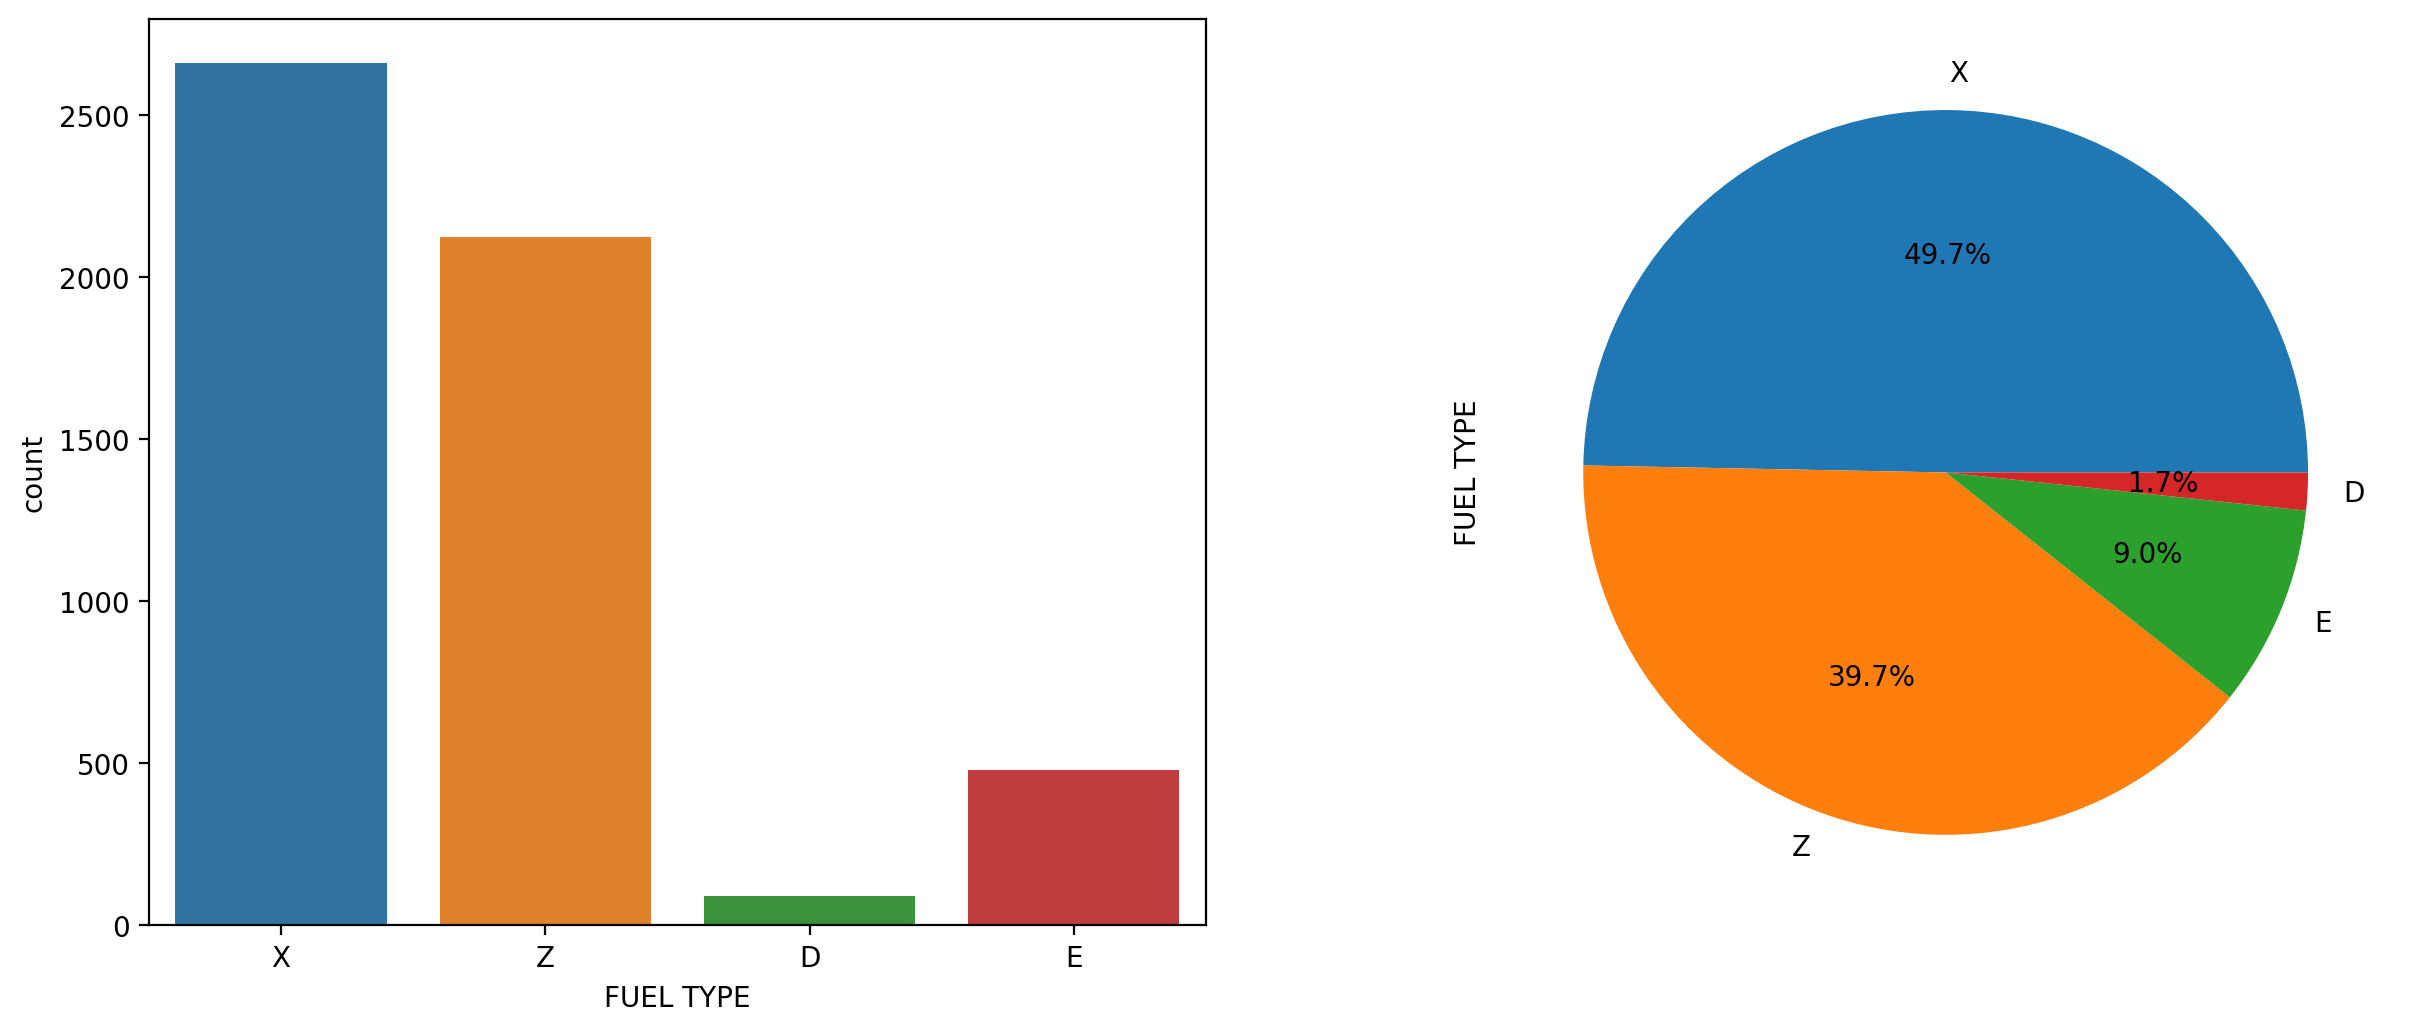

In [58]:
fig, ax_position = plt.subplots(1, 2, figsize=(15, 6), dpi=200)
a = sns.countplot(x='FUEL TYPE', data = fuel_consum_df, ax=ax_position[0])
a = fuel_consum_df['FUEL TYPE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])

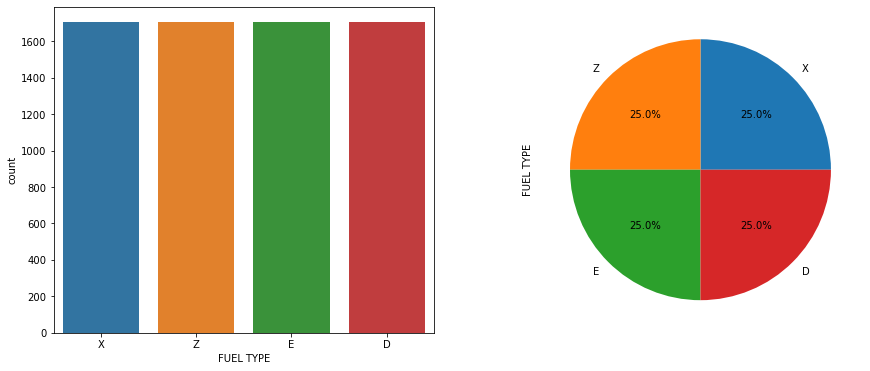

In [59]:
x_residuals, y_residuals = smoting_data(X_train_df, y_train, 'FUEL TYPE')

### CROSS VALIDATION

In [60]:
#function defined to cross validate classifiers
def cross_validate_(estimator, X_, y_):
    model_score = cross_val_score(estimator, X_, y_, scoring='accuracy', cv=5)
    score_std = model_score.std().round(2)
    score_mean = model_score.mean().round(2)
    print(model_score)
    print('Accuracy')
    print(f'mean: {score_mean}, std: {score_std}')

In [61]:
#function defined for evaluation metrics(method of model selection)
def testing_classifier_model(model, X, y):
    y_pred = model.predict(X)
    Accuracy = accuracy_score(y, y_pred)
    print(f"The Accuracy is: {Accuracy:.2f}")

### Decision Tree Classifier

In [62]:
dc = DecisionTreeClassifier()
cross_validate_(dc, x_residuals, y_residuals)

[0.98533724 0.98899486 0.98752751 0.98459281 0.98239178]
Accuracy
mean: 0.99, std: 0.0


### K-Nearest Neighbor Classifier

In [63]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html   5/12/2022  AFTER MIDNIGHT
Knn_classifier = KNeighborsClassifier()
cross_validate_(Knn_classifier, x_residuals, y_residuals)

[0.90175953 0.90975789 0.91195891 0.90535583 0.90535583]
Accuracy
mean: 0.91, std: 0.0


### FEATURE SELECTION

In [64]:
#https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html  5/12/2022
select = SelectKBest(chi2, k=50)
X_new = select.fit_transform(x_residuals, y_residuals)
X_te_new = select.transform(X_test_df)
X_v_new = select.transform(X_val_df)


X_new_train = pd.DataFrame(X_new, index=x_residuals.index,columns=select.get_feature_names_out())
X_new_test = pd.DataFrame(X_te_new, index=X_test_df.index,columns=select.get_feature_names_out())
X_new_val = pd.DataFrame(X_v_new, index=X_val_df.index,columns=select.get_feature_names_out())

### Grid Search and Cross Validation on the final model

In [65]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier 2/12/2022 3:15pm
parameters = {
              'max_depth': [20,30,40]
              }

deci_model = GridSearchCV(dc, parameters)
deci_model.fit(X_new_train, y_residuals)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [20, 30, 40]})

In [66]:
print(deci_model.best_params_)
print('\n')
testing_classifier_model(deci_model, X_new_test, y_test)
testing_classifier_model(deci_model, X_new_val, y_val)

{'max_depth': 30}


The Accuracy is: 0.96
The Accuracy is: 0.96


In [67]:
y_pred = deci_model.predict(X_new_test)
y_pred

array(['Z', 'Z', 'X', ..., 'Z', 'X', 'X'], dtype=object)

                                       Feature_importance
FC_COMB(L/100km)                                 0.271810
ENGINE SIZE                                      0.160995
MAKE_VOLKSWAGEN                                  0.100493
FC_COMB(mpg)                                     0.060117
MAKE_MERCEDES-BENZ                               0.048451
MAKE_AUDI                                        0.042468
MAKE_BMW                                         0.040533
MAKE_PORSCHE                                     0.037687
MAKE_MINI                                        0.025799
MODEL_Q7 TDI (modified)                          0.021768
VEHICLE CLASS_TWO-SEATER                         0.017966
MODEL_TOUAREG TDI (modified)                     0.017859
VEHICLE CLASS_PICKUP TRUCK - STANDARD            0.016921
VEHICLE CLASS_COMPACT                            0.014813
TRANSMISSION_A4                                  0.014617
VEHICLE CLASS_FULL-SIZE                          0.013430
MAKE_INFINITI 

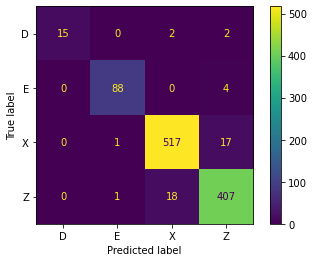

<Figure size 8000x8000 with 0 Axes>

In [68]:
def report_deci_model_test(model, X, y):
    basem_preds = model.predict(X)
    
    feature_importance = pd.DataFrame(data=model.best_estimator_.feature_importances_, index = X.columns,
                                     columns = ['Feature_importance']).sort_values('Feature_importance', ascending=False)
    print(feature_importance)
    print(classification_report(y, basem_preds))
    ConfusionMatrixDisplay.from_estimator(model, X, y)
    
    plt.show()
    plt.figure(figsize=(40,40), dpi = 200);
    return basem_preds
    
a=report_deci_model_test(deci_model, X_new_test, y_test)

                                       Feature_importance
FC_COMB(L/100km)                                 0.271810
ENGINE SIZE                                      0.160995
MAKE_VOLKSWAGEN                                  0.100493
FC_COMB(mpg)                                     0.060117
MAKE_MERCEDES-BENZ                               0.048451
MAKE_AUDI                                        0.042468
MAKE_BMW                                         0.040533
MAKE_PORSCHE                                     0.037687
MAKE_MINI                                        0.025799
MODEL_Q7 TDI (modified)                          0.021768
VEHICLE CLASS_TWO-SEATER                         0.017966
MODEL_TOUAREG TDI (modified)                     0.017859
VEHICLE CLASS_PICKUP TRUCK - STANDARD            0.016921
VEHICLE CLASS_COMPACT                            0.014813
TRANSMISSION_A4                                  0.014617
VEHICLE CLASS_FULL-SIZE                          0.013430
MAKE_INFINITI 

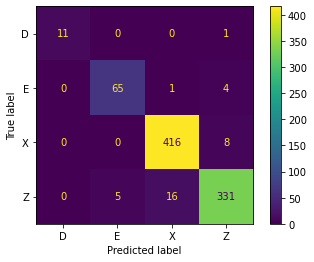

<Figure size 8000x8000 with 0 Axes>

In [69]:
b = report_deci_model_test(deci_model, X_new_val, y_val)

## MAKE

In [70]:
X_train, X_test, X_val, y_train, y_test, y_val  = train_test_split_(fuel_consum_df, 'MAKE')

X_train_num, X_train_cat = categorical_numeric_data(X_train)
X_test_num, X_test_cat = categorical_numeric_data(X_test)
X_val_num, X_val_cat = categorical_numeric_data(X_val)

X_scaled_num_tr, X_scaled_num_te, X_scaled_num_v = scaling_(X_train_num, X_test_num, X_val_num)

X_train_encoded, X_test_encoded, X_val_encoded = one_hot_encod_(X_train_cat, X_test_cat, X_val_cat)


X_train_df, X_test_df, X_val_df= concat_(X_scaled_num_tr, X_train_encoded), concat_(X_scaled_num_te, X_test_encoded), concat_(X_scaled_num_v, X_val_encoded)

In [71]:
# fig, ax_position = plt.subplots(1, 2, figsize=(15, 6), dpi=200)
# a = sns.countplot(x='MAKE', data = fuel_consum_df, ax=ax_position[0])
# a = fuel_consum_df['MAKE'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])

In [72]:
# x_residuals, y_residuals = smoting_data(X_train_df, y_train, 'MAKE')

In [73]:
#CROSS VALIDATE MODELS TO CHOOSE THE BEST THAT FOR THE DATASET
dc = DecisionTreeClassifier()
cross_validate_(dc, X_train_df, y_train)

Knn_classifier = KNeighborsClassifier()
cross_validate_(Knn_classifier, X_train_df, y_train)

#FEATURE SELECTION
select = SelectKBest(chi2, k=30)
X_new = select.fit_transform(X_train_df, y_train)
X_te_new = select.transform(X_test_df)
X_v_new = select.transform(X_val_df)


X_new_train = pd.DataFrame(X_new, index=X_train_df.index,columns=select.get_feature_names_out())
X_new_test = pd.DataFrame(X_te_new, index=X_test_df.index,columns=select.get_feature_names_out())
X_new_val = pd.DataFrame(X_v_new, index=X_val_df.index,columns=select.get_feature_names_out())

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[0.85276968 0.84548105 0.8425656  0.80466472 0.84671533]
Accuracy
mean: 0.84, std: 0.02


C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


[0.74198251 0.74344023 0.73906706 0.69825073 0.69927007]
Accuracy
mean: 0.72, std: 0.02


In [74]:
#GRIDSEARCH AND CROSS VALIDATE THE BEST MODEL CHOSEN
parameters = {
              'max_depth': [60,70,90]
              }

deci_model = GridSearchCV(dc, parameters)
deci_model.fit(X_new_train, y_train)

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [60, 70, 90]})

In [75]:
print(deci_model.best_params_)
print('\n')
testing_classifier_model(deci_model, X_new_test, y_test)
testing_classifier_model(deci_model, X_new_val, y_val)

{'max_depth': 60}


The Accuracy is: 0.25
The Accuracy is: 0.23


In [76]:
y_pred = deci_model.predict(X_new_test)
y_pred

array(['MERCEDES-BENZ', 'MERCEDES-BENZ', 'CHEVROLET', ..., 'PORSCHE',
       'CHEVROLET', 'CHEVROLET'], dtype=object)

                           Feature_importance
FUEL TYPE_Z                          0.249282
VEHICLE CLASS_MINICOMPACT            0.161121
TRANSMISSION_AS7                     0.151079
TRANSMISSION_A7                      0.126087
TRANSMISSION_AS8                     0.067843
FUEL TYPE_X                          0.049497
MODEL_TSX                            0.021792
MODEL_DB9                            0.019129
MODEL_tC                             0.017282
MODEL_QUATTROPORTE                   0.015145
MODEL_CONTINENTAL GTC                0.012909
MODEL_GRANTURISMO                    0.012785
MODEL_FORTWO CABRIOLET               0.012742
MODEL_PHANTOM EWB                    0.012447
MODEL_GALLARDO                       0.010184
MODEL_GALLARDO SPYDER                0.010087
MODEL_FORTWO COUPE                   0.007737
MODEL_H3T 4WD                        0.007731
MODEL_VEYRON                         0.006363
MODEL_612 SCAGLIETTI                 0.005158
MODEL_H3 4WD                      

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

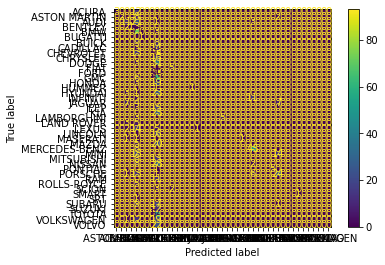

array(['MERCEDES-BENZ', 'MERCEDES-BENZ', 'CHEVROLET', ..., 'PORSCHE',
       'CHEVROLET', 'CHEVROLET'], dtype=object)

<Figure size 8000x8000 with 0 Axes>

In [77]:
report_deci_model_test(deci_model, X_new_test, y_test)

## YEAR

In [78]:
X_train, X_test, X_val, y_train, y_test, y_val  = train_test_split_(fuel_consum_df, 'YEAR')

X_train_num, X_train_cat = categorical_numeric_data(X_train)
X_test_num, X_test_cat = categorical_numeric_data(X_test)
X_val_num, X_val_cat = categorical_numeric_data(X_val)

X_scaled_num_tr, X_scaled_num_te, X_scaled_num_v = scaling_(X_train_num, X_test_num, X_val_num)

X_train_encoded, X_test_encoded, X_val_encoded = one_hot_encod_(X_train_cat, X_test_cat, X_val_cat)


X_train_df, X_test_df, X_val_df= concat_(X_scaled_num_tr, X_train_encoded), concat_(X_scaled_num_te, X_test_encoded), concat_(X_scaled_num_v, X_val_encoded)

In [79]:
#CROSS VALIDATE MODELS TO CHOOSE THE BEST THAT FOR THE DATASET
dc = DecisionTreeClassifier()
cross_validate_(dc, X_train_df, y_train)

Knn_classifier = KNeighborsClassifier()
cross_validate_(Knn_classifier, X_train_df, y_train)

#FEATURE SELECTION
select = SelectKBest(chi2, k=50)
X_new = select.fit_transform(X_train_df, y_train)
X_te_new = select.transform(X_test_df)
X_v_new = select.transform(X_val_df)


X_new_train = pd.DataFrame(X_new, index=X_train_df.index,columns=select.get_feature_names_out())
X_new_test = pd.DataFrame(X_te_new, index=X_test_df.index,columns=select.get_feature_names_out())
X_new_val = pd.DataFrame(X_v_new, index=X_val_df.index,columns=select.get_feature_names_out())

[0.20408163 0.22011662 0.22740525 0.26093294 0.23941606]
Accuracy
mean: 0.23, std: 0.02
[0.22157434 0.22303207 0.24489796 0.24635569 0.2540146 ]
Accuracy
mean: 0.24, std: 0.01


In [80]:
#GRIDSEARCH AND CROSS VALIDATE THE BEST MODEL CHOSEN
parameters = {
              'max_depth': [60,70,90]
              }

deci_model = GridSearchCV(dc, parameters)
deci_model.fit(X_new_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [60, 70, 90]})

In [81]:
print(deci_model.best_params_)
print('\n')
testing_classifier_model(deci_model, X_new_test, y_test)
testing_classifier_model(deci_model, X_new_val, y_val)

{'max_depth': 60}


The Accuracy is: 0.28
The Accuracy is: 0.30


In [82]:
y_pred = deci_model.predict(X_new_test)
y_pred

array(['2013', '2014', '2012', ..., '2012', '2010', '2010'], dtype=object)

                                       Feature_importance
VEHICLE CLASS_SUV                                0.215834
VEHICLE CLASS_SUV - SMALL                        0.132368
VEHICLE CLASS_SUV - STANDARD                     0.104718
TRANSMISSION_AS8                                 0.036548
TRANSMISSION_A8                                  0.035579
VEHICLE CLASS_SUBCOMPACT                         0.033400
VEHICLE CLASS_MID-SIZE                           0.028387
TRANSMISSION_A6                                  0.027500
TRANSMISSION_AS5                                 0.024749
VEHICLE CLASS_PICKUP TRUCK - SMALL               0.023295
TRANSMISSION_AM7                                 0.019595
TRANSMISSION_A4                                  0.016897
TRANSMISSION_AM6                                 0.016699
TRANSMISSION_A5                                  0.013198
MODEL_F-150 FFV                                  0.013132
TRANSMISSION_A7                                  0.011964
VEHICLE CLASS_

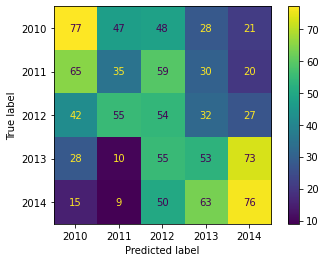

array(['2013', '2014', '2012', ..., '2012', '2010', '2010'], dtype=object)

<Figure size 8000x8000 with 0 Axes>

In [83]:
#evaluation
report_deci_model_test(deci_model, X_new_test, y_test)

                                       Feature_importance
VEHICLE CLASS_SUV                                0.215834
VEHICLE CLASS_SUV - SMALL                        0.132368
VEHICLE CLASS_SUV - STANDARD                     0.104718
TRANSMISSION_AS8                                 0.036548
TRANSMISSION_A8                                  0.035579
VEHICLE CLASS_SUBCOMPACT                         0.033400
VEHICLE CLASS_MID-SIZE                           0.028387
TRANSMISSION_A6                                  0.027500
TRANSMISSION_AS5                                 0.024749
VEHICLE CLASS_PICKUP TRUCK - SMALL               0.023295
TRANSMISSION_AM7                                 0.019595
TRANSMISSION_A4                                  0.016897
TRANSMISSION_AM6                                 0.016699
TRANSMISSION_A5                                  0.013198
MODEL_F-150 FFV                                  0.013132
TRANSMISSION_A7                                  0.011964
VEHICLE CLASS_

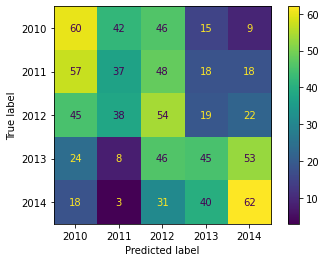

array(['2010', '2014', '2012', '2014', '2011', '2012', '2013', '2010',
       '2012', '2014', '2010', '2012', '2010', '2012', '2012', '2010',
       '2011', '2012', '2013', '2011', '2014', '2012', '2010', '2011',
       '2014', '2012', '2014', '2013', '2011', '2011', '2011', '2011',
       '2013', '2013', '2012', '2010', '2014', '2012', '2013', '2013',
       '2012', '2012', '2013', '2012', '2010', '2013', '2013', '2012',
       '2014', '2012', '2012', '2012', '2014', '2010', '2012', '2010',
       '2010', '2013', '2014', '2010', '2012', '2010', '2012', '2013',
       '2014', '2011', '2011', '2011', '2014', '2012', '2010', '2013',
       '2012', '2011', '2010', '2011', '2013', '2014', '2012', '2013',
       '2010', '2011', '2014', '2011', '2012', '2013', '2010', '2012',
       '2014', '2014', '2012', '2012', '2011', '2014', '2013', '2014',
       '2013', '2013', '2012', '2014', '2012', '2010', '2011', '2011',
       '2010', '2014', '2014', '2012', '2011', '2010', '2012', '2011',
      

<Figure size 8000x8000 with 0 Axes>

In [84]:
report_deci_model_test(deci_model, X_new_val, y_val)

## VEHICLE CLASS

In [85]:
X_train, X_test, X_val, y_train, y_test, y_val  = train_test_split_(fuel_consum_df, 'VEHICLE CLASS')

X_train_num, X_train_cat = categorical_numeric_data(X_train)
X_test_num, X_test_cat = categorical_numeric_data(X_test)
X_val_num, X_val_cat = categorical_numeric_data(X_val)

X_scaled_num_tr, X_scaled_num_te, X_scaled_num_v = scaling_(X_train_num, X_test_num, X_val_num)

X_train_encoded, X_test_encoded, X_val_encoded = one_hot_encod_(X_train_cat, X_test_cat, X_val_cat)


X_train_df, X_test_df, X_val_df= concat_(X_scaled_num_tr, X_train_encoded), concat_(X_scaled_num_te, X_test_encoded), concat_(X_scaled_num_v, X_val_encoded)

In [86]:
#CROSS VALIDATE MODELS TO CHOOSE THE BEST THAT FOR THE DATASET
dc = DecisionTreeClassifier()
cross_validate_(dc, X_train_df, y_train)

Knn_classifier = KNeighborsClassifier()
cross_validate_(Knn_classifier, X_train_df, y_train)

#FEATURE SELECTION
select = SelectKBest(chi2, k=50)
X_new = select.fit_transform(X_train_df, y_train)
X_te_new = select.transform(X_test_df)
X_v_new = select.transform(X_val_df)


X_new_train = pd.DataFrame(X_new, index=X_train_df.index,columns=select.get_feature_names_out())
X_new_test = pd.DataFrame(X_te_new, index=X_test_df.index,columns=select.get_feature_names_out())
X_new_val = pd.DataFrame(X_v_new, index=X_val_df.index,columns=select.get_feature_names_out())

[0.76676385 0.72157434 0.71720117 0.7303207  0.72116788]
Accuracy
mean: 0.73, std: 0.02
[0.65014577 0.68221574 0.67055394 0.66763848 0.64087591]
Accuracy
mean: 0.66, std: 0.01


In [87]:
#GRIDSEARCH AND CROSS VALIDATE THE BEST MODEL CHOSEN
parameters = {
              'max_depth': [60,70,90]
              }

deci_model = GridSearchCV(dc, parameters)
deci_model.fit(X_new_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [60, 70, 90]})

In [88]:
print(deci_model.best_params_)
print('\n')
testing_classifier_model(deci_model, X_new_test, y_test)
testing_classifier_model(deci_model, X_new_val, y_val)

{'max_depth': 60}


The Accuracy is: 0.31
The Accuracy is: 0.34


In [89]:
y_pred = deci_model.predict(X_new_test)
y_pred

array(['MID-SIZE', 'MID-SIZE', 'PICKUP TRUCK - SMALL', ..., 'MINICOMPACT',
       'SUV - SMALL', 'MID-SIZE'], dtype=object)

                              Feature_importance
FUEL TYPE_Z                             0.096096
MAKE_PORSCHE                            0.079669
TRANSMISSION_A8                         0.059129
TRANSMISSION_A6                         0.056258
TRANSMISSION_A4                         0.053689
MAKE_CHEVROLET                          0.042185
MAKE_JEEP                               0.039715
TRANSMISSION_M6                         0.036656
MAKE_GMC                                0.036325
MAKE_RAM                                0.031558
MODEL_SILVERADO 4WD                     0.028931
FUEL TYPE_X                             0.027789
MODEL_SIERRA 4WD                        0.025612
MODEL_SIERRA                            0.025136
MODEL_SILVERADO                         0.025127
MODEL_COROLLA MATRIX                    0.023432
MODEL_F150 FFV 4X4                      0.022122
MODEL_SOUL                              0.020288
MODEL_TACOMA 4WD                        0.018718
FUEL TYPE_E         

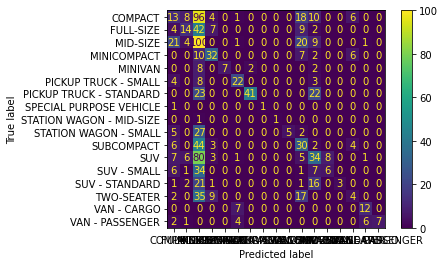

array(['MID-SIZE', 'MID-SIZE', 'PICKUP TRUCK - SMALL', ..., 'MINICOMPACT',
       'SUV - SMALL', 'MID-SIZE'], dtype=object)

<Figure size 8000x8000 with 0 Axes>

In [90]:
report_deci_model_test(deci_model, X_new_test, y_test)

                              Feature_importance
FUEL TYPE_Z                             0.096096
MAKE_PORSCHE                            0.079669
TRANSMISSION_A8                         0.059129
TRANSMISSION_A6                         0.056258
TRANSMISSION_A4                         0.053689
MAKE_CHEVROLET                          0.042185
MAKE_JEEP                               0.039715
TRANSMISSION_M6                         0.036656
MAKE_GMC                                0.036325
MAKE_RAM                                0.031558
MODEL_SILVERADO 4WD                     0.028931
FUEL TYPE_X                             0.027789
MODEL_SIERRA 4WD                        0.025612
MODEL_SIERRA                            0.025136
MODEL_SILVERADO                         0.025127
MODEL_COROLLA MATRIX                    0.023432
MODEL_F150 FFV 4X4                      0.022122
MODEL_SOUL                              0.020288
MODEL_TACOMA 4WD                        0.018718
FUEL TYPE_E         

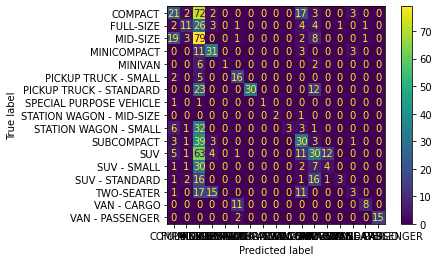

array(['MID-SIZE', 'MID-SIZE', 'SUV', 'SUBCOMPACT', 'SUV', 'MID-SIZE',
       'MID-SIZE', 'MID-SIZE', 'SUBCOMPACT', 'SUV', 'MID-SIZE',
       'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'SUBCOMPACT',
       'SUV', 'COMPACT', 'MID-SIZE', 'VAN - PASSENGER', 'MID-SIZE',
       'MINICOMPACT', 'MID-SIZE', 'SUBCOMPACT', 'PICKUP TRUCK - STANDARD',
       'MINICOMPACT', 'MINICOMPACT', 'MID-SIZE', 'SUV - SMALL',
       'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'MID-SIZE',
       'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'MID-SIZE',
       'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT', 'MID-SIZE', 'MID-SIZE',
       'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'SUV',
       'SUBCOMPACT', 'MID-SIZE', 'FULL-SIZE', 'PICKUP TRUCK - STANDARD',
       'MID-SIZE', 'SUBCOMPACT', 'MID-SIZE', 'MID-SIZE', 'SUV',
       'PICKUP TRUCK - STANDARD', 'SUBCOMPACT', 'MID-SIZE', 'SUBCOMPACT',
       'MID-SIZE', 'MID-SIZE', 'MID-SIZE', 'SUV', 'SUBCOMPACT',
       'MINICOMPACT', 'MID-SIZE', 

<Figure size 8000x8000 with 0 Axes>

In [92]:
report_deci_model_test(deci_model, X_new_val, y_val)

## TRANSMISSIONS

In [93]:
X_train, X_test, X_val, y_train, y_test, y_val  = train_test_split_(fuel_consum_df, 'TRANSMISSION')

X_train_num, X_train_cat = categorical_numeric_data(X_train)
X_test_num, X_test_cat = categorical_numeric_data(X_test)
X_val_num, X_val_cat = categorical_numeric_data(X_val)

X_scaled_num_tr, X_scaled_num_te, X_scaled_num_v = scaling_(X_train_num, X_test_num, X_val_num)

X_train_encoded, X_test_encoded, X_val_encoded = one_hot_encod_(X_train_cat, X_test_cat, X_val_cat)


X_train_df, X_test_df, X_val_df= concat_(X_scaled_num_tr, X_train_encoded), concat_(X_scaled_num_te, X_test_encoded), concat_(X_scaled_num_v, X_val_encoded)

In [94]:
#CROSS VALIDATE MODELS TO CHOOSE THE BEST THAT FOR THE DATASET
dc = DecisionTreeClassifier()
cross_validate_(dc, X_train_df, y_train)

Knn_classifier = KNeighborsClassifier()
cross_validate_(Knn_classifier, X_train_df, y_train)

#FEATURE SELECTION
select = SelectKBest(chi2, k=50)
X_new = select.fit_transform(X_train_df, y_train)
X_te_new = select.transform(X_test_df)
X_v_new = select.transform(X_val_df)


X_new_train = pd.DataFrame(X_new, index=X_train_df.index,columns=select.get_feature_names_out())
X_new_test = pd.DataFrame(X_te_new, index=X_test_df.index,columns=select.get_feature_names_out())
X_new_val = pd.DataFrame(X_v_new, index=X_val_df.index,columns=select.get_feature_names_out())

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.70991254 0.70699708 0.7361516  0.69533528 0.71240876]
Accuracy
mean: 0.71, std: 0.01


C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.58600583 0.58017493 0.56413994 0.55976676 0.57810219]
Accuracy
mean: 0.57, std: 0.01


In [95]:
#GRIDSEARCH AND CROSS VALIDATE THE BEST MODEL CHOSEN
parameters = {
              'max_depth': [60,70,90]
              }

deci_model = GridSearchCV(dc, parameters)
deci_model.fit(X_new_train, y_train)

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [60, 70, 90]})

In [96]:
print(deci_model.best_params_)
print('\n')
testing_classifier_model(deci_model, X_new_test, y_test)
testing_classifier_model(deci_model, X_new_val, y_val)

{'max_depth': 90}


The Accuracy is: 0.45
The Accuracy is: 0.49


In [97]:
y_pred = deci_model.predict(X_new_test)
y_pred

array(['AS7', 'AS7', 'A4', ..., 'AS7', 'AV', 'AS6'], dtype=object)

                                       Feature_importance
FUEL TYPE_Z                                      0.084334
MAKE_MERCEDES-BENZ                               0.071514
MAKE_GMC                                         0.064262
VEHICLE CLASS_PICKUP TRUCK - SMALL               0.062938
VEHICLE CLASS_MID-SIZE                           0.060730
VEHICLE CLASS_VAN - CARGO                        0.060413
VEHICLE CLASS_FULL-SIZE                          0.053760
MAKE_CHEVROLET                                   0.036893
MAKE_BMW                                         0.036859
MAKE_INFINITI                                    0.034476
VEHICLE CLASS_SUV - SMALL                        0.033332
MAKE_NISSAN                                      0.031042
MAKE_PORSCHE                                     0.030367
VEHICLE CLASS_PICKUP TRUCK - STANDARD            0.029486
VEHICLE CLASS_TWO-SEATER                         0.023170
MAKE_DODGE                                       0.021616
MAKE_SUBARU   

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

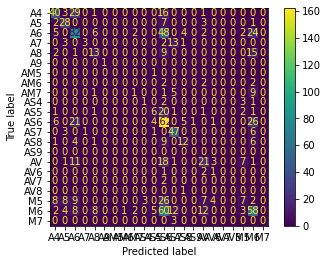

array(['AS7', 'AS7', 'A4', ..., 'AS7', 'AV', 'AS6'], dtype=object)

<Figure size 8000x8000 with 0 Axes>

In [98]:
report_deci_model_test(deci_model, X_new_test, y_test)

                                       Feature_importance
FUEL TYPE_Z                                      0.084334
MAKE_MERCEDES-BENZ                               0.071514
MAKE_GMC                                         0.064262
VEHICLE CLASS_PICKUP TRUCK - SMALL               0.062938
VEHICLE CLASS_MID-SIZE                           0.060730
VEHICLE CLASS_VAN - CARGO                        0.060413
VEHICLE CLASS_FULL-SIZE                          0.053760
MAKE_CHEVROLET                                   0.036893
MAKE_BMW                                         0.036859
MAKE_INFINITI                                    0.034476
VEHICLE CLASS_SUV - SMALL                        0.033332
MAKE_NISSAN                                      0.031042
MAKE_PORSCHE                                     0.030367
VEHICLE CLASS_PICKUP TRUCK - STANDARD            0.029486
VEHICLE CLASS_TWO-SEATER                         0.023170
MAKE_DODGE                                       0.021616
MAKE_SUBARU   

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

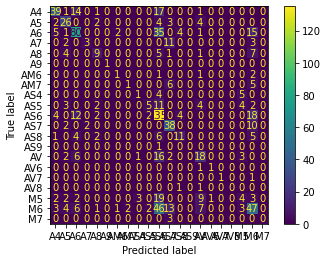

array(['AS6', 'AS6', 'A6', 'AS8', 'A6', 'M6', 'AS6', 'M5', 'AS6', 'A6',
       'A5', 'AS6', 'AS6', 'AS6', 'AS6', 'M6', 'A6', 'M6', 'AS5', 'A4',
       'AS8', 'AS7', 'AS6', 'M6', 'A6', 'AS7', 'AS7', 'AS6', 'AV', 'AS6',
       'AS6', 'AS7', 'AS6', 'AS7', 'M6', 'M6', 'A6', 'AS7', 'AS7', 'AS6',
       'AS7', 'AS6', 'AS6', 'AS7', 'A5', 'AS6', 'M6', 'AS7', 'AS7', 'A6',
       'M6', 'AS7', 'A8', 'A6', 'M6', 'AS6', 'A5', 'M6', 'AS6', 'A6',
       'M6', 'A5', 'M6', 'AS6', 'AS8', 'AS6', 'A6', 'M6', 'M6', 'AS7',
       'AS6', 'AS6', 'AS7', 'AS7', 'AS6', 'AS6', 'M6', 'AS6', 'AS6',
       'AS6', 'A4', 'A6', 'A5', 'AS6', 'A6', 'AS6', 'M6', 'AS6', 'M6',
       'A6', 'AS6', 'AS6', 'A6', 'A8', 'AS6', 'A6', 'AS6', 'AS6', 'A5',
       'AV', 'AV', 'A5', 'AS6', 'AS6', 'A4', 'AS6', 'A5', 'AS7', 'AS6',
       'A6', 'AS6', 'M6', 'A6', 'M6', 'A6', 'A4', 'AS6', 'AS6', 'M6',
       'AS6', 'AS7', 'AS8', 'A6', 'AS6', 'A6', 'AS6', 'AS6', 'A5', 'AS7',
       'AS6', 'A6', 'M5', 'AS7', 'AS6', 'AS6', 'A5', 'A6', 'AS6',

<Figure size 8000x8000 with 0 Axes>

In [99]:
report_deci_model_test(deci_model, X_new_val, y_val)

## MODEL

In [100]:
X_train, X_test, X_val, y_train, y_test, y_val  = train_test_split_(fuel_consum_df, 'MODEL')

X_train_num, X_train_cat = categorical_numeric_data(X_train)
X_test_num, X_test_cat = categorical_numeric_data(X_test)
X_val_num, X_val_cat = categorical_numeric_data(X_val)

X_scaled_num_tr, X_scaled_num_te, X_scaled_num_v = scaling_(X_train_num, X_test_num, X_val_num)

X_train_encoded, X_test_encoded, X_val_encoded = one_hot_encod_(X_train_cat, X_test_cat, X_val_cat)


X_train_df, X_test_df, X_val_df= concat_(X_scaled_num_tr, X_train_encoded), concat_(X_scaled_num_te, X_test_encoded), concat_(X_scaled_num_v, X_val_encoded)

In [101]:
# fig, ax_position = plt.subplots(1, 2, figsize=(15, 6), dpi=200)
# a = sns.countplot(x='MODEL', data = fuel_consum_df, ax=ax_position[0])
# a = fuel_consum_df['MODEL'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])

In [102]:
#CROSS VALIDATE MODELS TO CHOOSE THE BEST THAT FOR THE DATASET
dc = DecisionTreeClassifier()
cross_validate_(dc, X_train_df, y_train)

Knn_classifier = KNeighborsClassifier()
cross_validate_(Knn_classifier, X_train_df, y_train)

#FEATURE SELECTION
select = SelectKBest(chi2, k=50)
X_new = select.fit_transform(X_train_df, y_train)
X_te_new = select.transform(X_test_df)
X_v_new = select.transform(X_val_df)


X_new_train = pd.DataFrame(X_new, index=X_train_df.index,columns=select.get_feature_names_out())
X_new_test = pd.DataFrame(X_te_new, index=X_test_df.index,columns=select.get_feature_names_out())
X_new_val = pd.DataFrame(X_v_new, index=X_val_df.index,columns=select.get_feature_names_out())

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.56997085 0.56413994 0.58017493 0.5451895  0.56058394]
Accuracy
mean: 0.56, std: 0.01


C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[0.34110787 0.35714286 0.32944606 0.32944606 0.31532847]
Accuracy
mean: 0.33, std: 0.01


In [103]:
#GRIDSEARCH AND CROSS VALIDATE THE BEST MODEL CHOSEN
parameters = {
              'max_depth': [60,70,90]
              }

deci_model = GridSearchCV(dc, parameters)
deci_model.fit(X_new_train, y_train)

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [60, 70, 90]})

In [104]:
print(deci_model.best_params_)
print('\n')
testing_classifier_model(deci_model, X_new_test, y_test)
testing_classifier_model(deci_model, X_new_val, y_val)

{'max_depth': 60}


The Accuracy is: 0.09
The Accuracy is: 0.08


In [105]:
y_pred = deci_model.predict(X_new_test)
y_pred

array(['C 250', 'C 250', 'CANYON CREW CAB', ..., '911 CARRERA CABRIOLET',
       'COMPASS', 'MAZDA3'], dtype=object)

                                        Feature_importance
VEHICLE CLASS_MINIVAN                             0.084849
VEHICLE CLASS_MINICOMPACT                         0.082533
VEHICLE CLASS_STATION WAGON - MID-SIZE            0.054244
MAKE_TOYOTA                                       0.053649
MAKE_NISSAN                                       0.051147
FUEL TYPE_D                                       0.047094
MAKE_DODGE                                        0.027638
MAKE_KIA                                          0.026591
MAKE_VOLKSWAGEN                                   0.024941
MAKE_CHRYSLER                                     0.024783
VEHICLE CLASS_VAN - PASSENGER                     0.024314
VEHICLE CLASS_PICKUP TRUCK - SMALL                0.024130
MAKE_MAZDA                                        0.023017
MAKE_JEEP                                         0.020923
MAKE_HYUNDAI                                      0.019903
MAKE_HONDA                                        0.0191

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

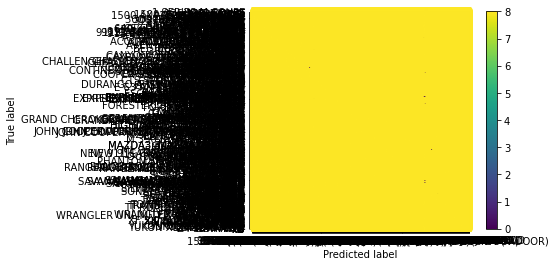

array(['C 250', 'C 250', 'CANYON CREW CAB', ..., '911 CARRERA CABRIOLET',
       'COMPASS', 'MAZDA3'], dtype=object)

<Figure size 8000x8000 with 0 Axes>

In [106]:
report_deci_model_test(deci_model, X_new_test, y_test)

                                        Feature_importance
VEHICLE CLASS_MINIVAN                             0.084849
VEHICLE CLASS_MINICOMPACT                         0.082533
VEHICLE CLASS_STATION WAGON - MID-SIZE            0.054244
MAKE_TOYOTA                                       0.053649
MAKE_NISSAN                                       0.051147
FUEL TYPE_D                                       0.047094
MAKE_DODGE                                        0.027638
MAKE_KIA                                          0.026591
MAKE_VOLKSWAGEN                                   0.024941
MAKE_CHRYSLER                                     0.024783
VEHICLE CLASS_VAN - PASSENGER                     0.024314
VEHICLE CLASS_PICKUP TRUCK - SMALL                0.024130
MAKE_MAZDA                                        0.023017
MAKE_JEEP                                         0.020923
MAKE_HYUNDAI                                      0.019903
MAKE_HONDA                                        0.0191

C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\708269\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use

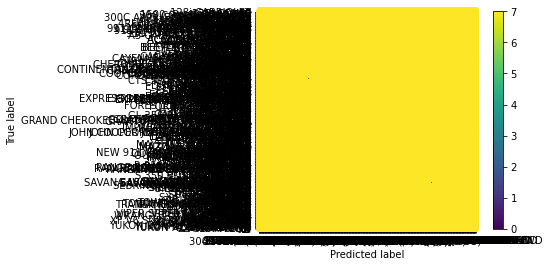

array(['QUATTROPORTE', 'TRANSIT CONNECT VAN', 'SIERRA 4WD', 'XF',
       'MAZDA3', 'SENTRA', 'CTS SPORT WAGON', 'IMPREZA AWD', 'JETTA',
       'SIERRA 4WD', 'CIVIC', 'SIERRA 4WD', 'C30 T5', 'SIERRA 4WD',
       'SIERRA 4WD', 'SIERRA 4WD', 'MKS AWD', 'GOLF WAGON TDI (modified)',
       'TSX', 'EXPRESS 2500 PASSENGER', 'GX 460', '911 CARRERA CABRIOLET',
       'COROLLA MATRIX', 'SIERRA 4WD', 'SIERRA 4WD',
       '911 CARRERA CABRIOLET', '911 CARRERA CABRIOLET', 'CIVIC',
       'COMPASS', 'SIERRA 4WD', 'GX 460', 'G37 COUPE', 'CTS SPORT WAGON',
       'C 250', 'GOLF WAGON TDI (modified)', 'MAZDA3',
       'RANGE ROVER SPORT SC', 'C 250', 'C 250', 'LANCER SPORTBACK',
       '911 CARRERA CABRIOLET', 'JETTA', 'RANGE ROVER EVOQUE COUPE',
       'C 250', 'FRONTIER', 'SIERRA 4WD', 'CONTINENTAL GTC', 'C 250',
       'G37 COUPE', 'SIERRA 4WD', 'VIPER', 'C 250', 'SIERRA 4WD',
       'SIERRA 4WD', 'CIVIC', 'GENESIS COUPE', 'C 250', 'REGAL',
       'TOWN & COUNTRY FFV', 'SIERRA 4WD', 'SIERRA 4WD', 'C

<Figure size 8000x8000 with 0 Axes>

In [107]:
report_deci_model_test(deci_model, X_new_val, y_val)

# CLUSTERING

In [108]:
min_max = MinMaxScaler()

In [109]:
df_num = dataframe_numeric[['ENGINE SIZE','FC_COMB(mpg)']]

In [110]:
df_num_scaled = min_max.fit_transform(df_num)

## Internal Evaluation Metrics

Text(0, 0.5, 'Distance Sum of Square')

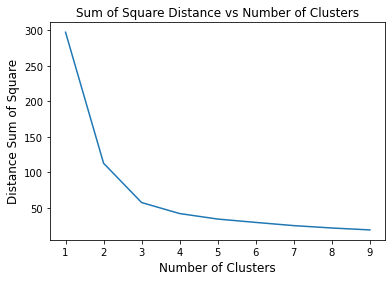

In [111]:
ss_distance = []
K = range(1, 10)
for clusters in K:
    K_means_clusters = KMeans(n_clusters =clusters)
    K_means_clusters.fit(df_num_scaled)
    ss_distance.append(K_means_clusters.inertia_)

plt.title('Sum of Square Distance vs Number of Clusters')   
plt.plot(K, ss_distance)
plt.xlabel('Number of Clusters' ,fontsize='12')
plt.ylabel('Distance Sum of Square', fontsize='12')

Text(0, 0.5, 'Davies Score')

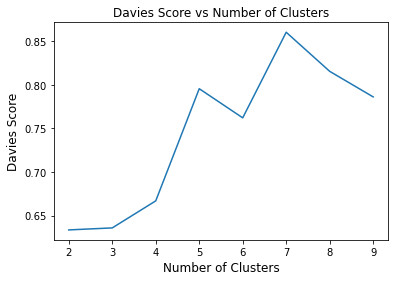

In [112]:
davies_score = []
K = range(2, 10)
for clusters in K:
    K_means_clusters = KMeans(n_clusters =clusters)
    #K_means_clusters.fit(df_num_scaled)
    kmeans_cluster_labels = K_means_clusters.fit_predict(df_num_scaled)
    m_davies= davies_bouldin_score(df_num_scaled, kmeans_cluster_labels)
    davies_score.append(m_davies)

plt.title('Davies Score vs Number of Clusters')   
plt.plot(K, davies_score)
plt.xlabel('Number of Clusters' ,fontsize='12')
plt.ylabel('Davies Score', fontsize='12')

In [113]:
k_means = KMeans(n_clusters =4)
kmeans_cluster_labels = k_means.fit_predict(df_num_scaled)

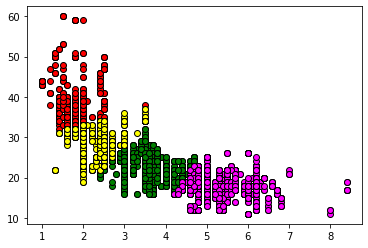

In [114]:
model_labels = list(set(kmeans_cluster_labels))
colors = ['red', 'green', 'yellow', 'magenta']
for label in model_labels:
    label_ = df_num[kmeans_cluster_labels == label]
    plt.scatter(label_['ENGINE SIZE'], label_['FC_COMB(mpg)'], color=colors[label], edgecolor='k')
plt.show()

<AxesSubplot:xlabel='ENGINE SIZE', ylabel='FC_COMB(mpg)'>

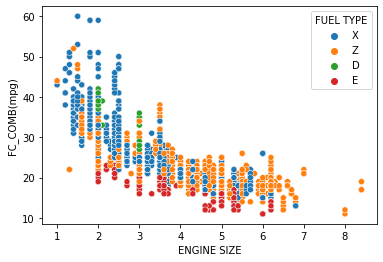

In [115]:
sns.scatterplot(data=fuel_consum_df, x='ENGINE SIZE', y='FC_COMB(mpg)', hue ='FUEL TYPE' )

## External Evaluation Metrics

In [116]:
dataframe_category.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL TYPE'], dtype='object')

In [117]:
kmeans_cluster_labels

array([2, 2, 2, ..., 1, 1, 1])

In [118]:
#using normalized_mutual_info_score evaluation metrics
#Accoring to this score, the category with the highest score best groups the dataset.
for col in dataframe_category.columns:
    score = normalized_mutual_info_score(kmeans_cluster_labels, dataframe_category[col], average_method='min')
    print(col, score)

YEAR 0.006535159581089875
MAKE 0.2873116705097504
MODEL 0.8528428749505145
VEHICLE CLASS 0.21667146347102767
TRANSMISSION 0.13276604131102876
FUEL TYPE 0.07083105949244019
